In [4]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import os
import warnings

sb.set_style(style = "darkgrid")

In [168]:
cancer_df = pd.read_csv(r"D:\Open Classroom\Data Files\World Health Statistics 2020\30-70cancerChdEtc.csv")
cancer_df.head()

,Location,Period,Indicator,Dim1,First Tooltip
0,Afghanistan,2016,Probability (%) of dying between age 30 and ex...,Both sexes,29.8
1,Afghanistan,2016,Probability (%) of dying between age 30 and ex...,Male,31.8
2,Afghanistan,2016,Probability (%) of dying between age 30 and ex...,Female,27.7
3,Afghanistan,2015,Probability (%) of dying between age 30 and ex...,Both sexes,29.8
4,Afghanistan,2015,Probability (%) of dying between age 30 and ex...,Male,31.9


#### Renaming Columns

In [170]:
cancer_df.rename(columns = {"Location": "location", "Period": "period", 
                                       "Indicator": "indicator", "Dim1": "dim1",
                                       "First Tooltip": "first_tooltip"}, inplace = True)

In [171]:
cancer_df.head()

,location,period,indicator,dim1,first_tooltip
0,Afghanistan,2016,Probability (%) of dying between age 30 and ex...,Both sexes,29.8
1,Afghanistan,2016,Probability (%) of dying between age 30 and ex...,Male,31.8
2,Afghanistan,2016,Probability (%) of dying between age 30 and ex...,Female,27.7
3,Afghanistan,2015,Probability (%) of dying between age 30 and ex...,Both sexes,29.8
4,Afghanistan,2015,Probability (%) of dying between age 30 and ex...,Male,31.9


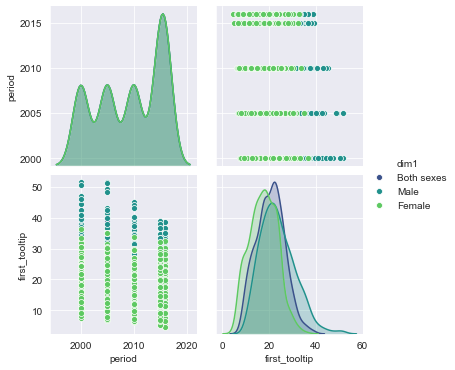

In [176]:
sb.pairplot(cancer_df, hue = "dim1", palette = "viridis")

In [81]:
loc_grp = cancer_df.groupby(["location", "period", "dim1"]).agg({"mean"})#.style.background_gradient(cmap = "viridis")
loc_grp.head(15)

first_tooltip
                                       mean
location    period dim1                    
Afghanistan 2000   Both sexes          34.4
                   Female              32.1
                   Male                36.6
            2005   Both sexes          34.1
                   Female              31.6
                   Male                36.5
            2010   Both sexes          31.7
                   Female              29.4
                   Male                34.1
            2015   Both sexes          29.8
                   Female              27.8
                   Male                31.9
            2016   Both sexes          29.8
                   Female              27.7
                   Male                31.8

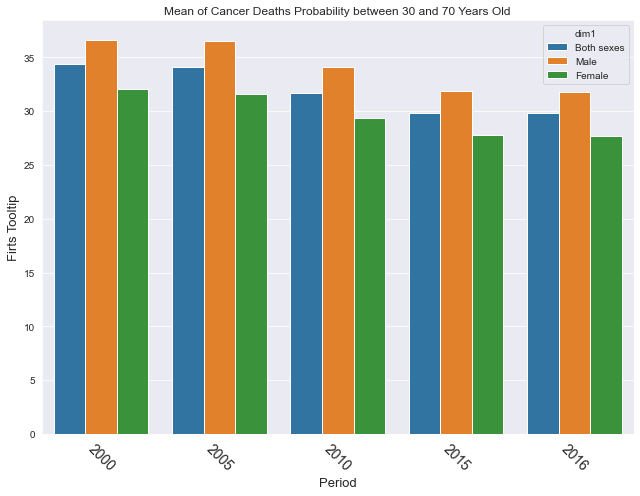

In [63]:
country = cancer_df.groupby("location")
loc = country.get_group("Afghanistan")
plt.figure(figsize = (9, 7))
plt.xticks(fontsize = 14, rotation = -45)
sb.barplot(x = "period", y = "first_tooltip", data = loc, hue = "dim1")
plt.title("Mean of Cancer Deaths Probability between 30 and 70 Years Old")
plt.xlabel("Period", fontsize = (13))
plt.ylabel("Firts Tooltip", fontsize = (13))
plt.tight_layout()

Text(43.0, 0.5, 'Period')

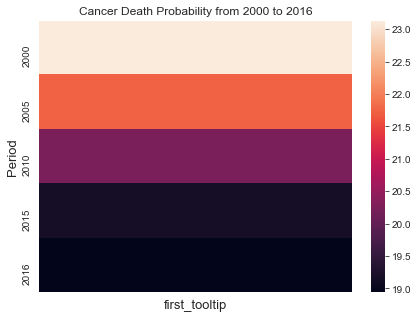

In [69]:
year = cancer_df.groupby("period").agg({"first_tooltip": "mean"})
plt.figure(figsize = (7, 5))
plt.xticks(fontsize = (13))
sb.heatmap(year)
plt.title("Cancer Death Probability from 2000 to 2016")
plt.ylabel("Period", fontsize = (13))

In [115]:
country_grp = cancer_df.groupby(["location", "first_tooltip"])
country_grp["location"].count()

location     first_tooltip
Afghanistan  27.7             1
             27.8             1
             29.4             1
             29.8             2
             31.6             1
                             ..
Zimbabwe     21.6             2
             21.7             1
             22.1             1
             22.5             1
             22.9             1
Name: location, Length: 2545, dtype: int64

In [119]:
cancer_pivot = cancer_df.reset_index().pivot(index = "period", columns = "location", values = "first_tooltip")
cancer_pivot

ValueError: Index contains duplicate entries, cannot reshape

In [124]:
adol_df = pd.read_csv(r"D:\Open Classroom\Data Files\World Health Statistics 2020\adolescentBirthRate.csv")
adol_df.head()

,Location,Period,Indicator,First Tooltip
0,Afghanistan,2017,Adolescent birth rate (per 1000 women aged 15-...,62.0
1,Afghanistan,2014,Adolescent birth rate (per 1000 women aged 15-...,77.2
2,Afghanistan,2013,Adolescent birth rate (per 1000 women aged 15-...,87.0
3,Afghanistan,2011,Adolescent birth rate (per 1000 women aged 15-...,125.7
4,Afghanistan,2009,Adolescent birth rate (per 1000 women aged 15-...,80.0


In [135]:
adol_df.rename(columns = {"Location": "location", "Period": "period",
                         "Indicator": "indicator", "First Tooltip": "first_tooltip"}, inplace = True)
adol_df

,location,period,indicator,first_tooltip
0,Afghanistan,2017,Adolescent birth rate (per 1000 women aged 15-...,62.0
1,Afghanistan,2014,Adolescent birth rate (per 1000 women aged 15-...,77.2
2,Afghanistan,2013,Adolescent birth rate (per 1000 women aged 15-...,87.0
3,Afghanistan,2011,Adolescent birth rate (per 1000 women aged 15-...,125.7
4,Afghanistan,2009,Adolescent birth rate (per 1000 women aged 15-...,80.0
...,...,...,...,...
2184,Zimbabwe,2008,Adolescent birth rate (per 1000 women aged 15-...,112.0
2185,Zimbabwe,2007,Adolescent birth rate (per 1000 women aged 15-...,102.6
2186,Zimbabwe,2004,Adolescent birth rate (per 1000 women aged 15-...,98.7
2187,Zimbabwe,2003,Adolescent birth rate (per 1000 women aged 15-...,101.0


Text(0.5, 1.0, 'Adolescent birth rate \n\n (per 1000 women aged 15-19 years)\n')

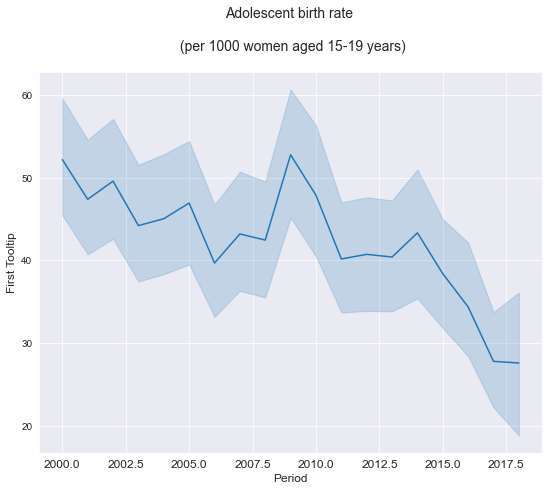

In [157]:
plt.figure(figsize = (9, 7))
sb.lineplot("period", "first_tooltip", data = adol_df, legend = "full")
#plt.legend(loc = 0)
plt.xticks(fontsize = (12))
plt.xlabel("Period", fontsize = (12))
plt.ylabel("First Tooltip", fontsize = (12))
plt.title("Adolescent birth rate \n\n (per 1000 women aged 15-19 years)\n", fontsize = (14))

In [ ]:
sb.pairplot(adol_df)